In [1]:
import numpy as np 
import os 
import cv2 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
import sklearn.metrics as skmetrics
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import confusion_matrix
from scipy.io import loadmat

import itertools
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml

#mnist = fetch_openml('mnist_784')

In [113]:
def plot_confusion_matrix(cm, classes,string,directory,dt,normalize=True):
    """
    Function which plots confusion matrix

    Input cm = confusion matrix
    Input classes = array with class labels
    Input string = string to give name of the saved image
    Input directory = string to give directory to save the image
    Input normalize (False) = If true function will give accuracy instead of pure number
    Input Title (Confusion matrix) = title of the image


    Output : None
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    accuracy_score = skmetrics.accuracy_score(y_pred, y_tst)
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title(' accuracy: ' + str(accuracy_score) + '   best rbf_kernel model: '+ str(dt))
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if(i==j):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            continue

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig(directory +'confusion_matrix'+string+'.jpg')
    
    
def apply_pca_to_train_and_test_images(train_vct, test_vct, perc = .95):
    """
    INPUT:
    train_vct = training vector of shape (N_samples, dimensionality)
    test_vct = testing vector of shape (N_samples, dimensionality)
    perc = percentage of variance that we want ot preserve 
    
    OUTPUT 
    train_transform = new training vector 
    test_transform = new test vector 
    """
    
    scaler = StandardScaler()
    scaler.fit(train_vct)
    train_vct = scaler.transform(train_vct)
    test_vct = scaler.transform(test_vct)
    pca = PCA(perc)
    pca.fit(train_vct)
    train_transform = pca.transform(train_vct)
    test_transform = pca.transform(test_vct)
    
    return train_transform, test_transform
    

In [3]:
species = ['Arthonia_radiata','Caloplaca_cerina','Candelariella_reflexa','Candelariella_xanthostigma','Chrysothrix_candelaris','Flavoparmelia_caperata','Gyalolechia_flavorubescens','Hyperphyscia_adglutinata'
        ,'Lecanora_argentata','Lecanora_chlarotera','Lecidella_elaeochroma','Melanelixia_glabratula'
        ,'Phaeophyscia_orbicularis','Physcia_biziana','Physconia_grisea','Ramalina_farinacea','Ramalina_fastigiata','Xanthomendoza_fallax','Xanthomendoza_fulva','flavoparmenia_soredians']


In [4]:
def calculate_and_plot_precision_recall(tst_lab, pred, species, directory, string):
    precision, recall, fbeta, support = precision_recall_fscore_support(tst_lab, pred)
    
    df = pd.DataFrame({"X":species, "precision":precision,"recall":recall,'f1score': fbeta})
    df.plot(x="X", y=["precision", "recall",'f1score'], kind="bar")
    plt.tight_layout()
    plt.savefig(directory +'precision_recall_class4class'+string+'.jpg')
    return np.mean(precision), np.mean(recall), np.mean(fbeta)



In [5]:
def load_descriptor_from_matfile(ft_path,label_list = species):
    #print(ft_path)
    feat = loadmat(ft_path)
    feat = feat['scattered_image']
    lab = ft_path.split('/')[2]

    lab = label_list.index(lab)
    return feat, lab


def extract_features(labels_list, or_pt,summing = True):
    data_all = []
    data_mean = []
    label = []

    for i, tp in enumerate(labels_list):
        pth = os.path.join(or_pt, tp)
        lich_files = os.listdir(pth)
        for j,mt in enumerate(lich_files):
            
            path = os.path.join(pth,mt)
            x,y = load_descriptor_from_matfile(path)
            xmean = None
            if summing :
                xmean = np.sum(np.sum(x,axis = 2),axis = 1)
                xmean = xmean.reshape(-1)
            else:
                xmean = np.mean(np.mean(x,axis = 2),axis = 1)
                xmean = xmean.reshape(-1)
            data_mean.append(xmean)
            label.append(y)


    data_mean = np.array(data_mean)
    label = np.array(label) 
    return  data_mean, label


In [ ]:
precision = []
recall = []
accuracy = []

## RADIAL BASIS KERNEL SVM WITH SUM

In [ ]:
c = ['1','2','3','4','5','6','7','8']


for cc in c:
    print('--------')
    print(cc)
    f = 'train/prova_4_' + cc + '_2_'
    g = 'test/prova_4_' + cc + '_2_'
    labels_list = os.listdir(f)
    title_lich = 'lichen_JLM_4'+ cc + '2_'
    x_train,  y_train = extract_features(labels_list,f)
    print(x_train.shape)
    x_test,  y_test = extract_features(labels_list,g)
    # PCA REDUCTION 
    #X_train, X_test, y_train, y_test = train_test_split(data_mean, label, test_size=0.70, random_state=10, shuffle=True)

    #svc  = OneVsRestClassifier(SVC(kernel = 'rbf',gamma = 'scale'),n_jobs = -1)
    #svc = svc.fit(x_train, y_train)
    #linear_score = svc.score(x_test,y_test)
    #print(linear_score)
    
    # First grid search to find best parameters
    param_grid = {'C': [ 1e2, 1e3, 5e3, 1e4, 5e4], 'gamma': [ 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 0.0001, 0.0005, 0.001, 0.005]}
    clf0 = GridSearchCV(SVC(kernel='rbf'), param_grid)
    clf = clf0.fit(x_train, y_train)
    print("Best estimator found by grid search : ", clf.best_estimator_)
    y_pred = clf.predict(x_test)
    print('Accuracy score :', skmetrics.accuracy_score(y_pred, y_test))
    accuracy.append(skmetrics.accuracy_score(y_pred, y_test))
    plt.figure(figsize = (15,10)) 

    plot_confusion_matrix(skmetrics.confusion_matrix(y_pred, y_test),labels_list,title_lich,'results/rbf/',clf.best_estimator_)
    a,b,c = calculate_and_plot_precision_recall(y_test, y_pred, species,'results/rbf/','pr_2_4_' + cc + '_' )
    #precision.append(a)
    #recall.append(b)

In [ ]:
# plot precision recall and accuracy 

import matplotlib.pyplot as plt
x1 = [1,2,3,4,5,6,7,8]
df = pd.DataFrame({"X":x1, "precision":precision,"recall":recall,'accuracy': accuracy})
df.plot(x="X", y=["precision", "recall",'accuracy'], kind="bar")
plt.grid()
plt.xlabel('number of rotations')
plt.ylabel('Percentate %')
plt.tight_layout()
plt.savefig('results/rbf/total_j2.jpg')

## RADIAL BASIS KERNEL linear WITH SUM

Best estimator found by grid search :  SVC(C=10000.0, gamma=0.005)
Accuracy score : 0.7616926503340757
0.7867224979072088
0.7737034994407558


<Figure size 1080x720 with 0 Axes>

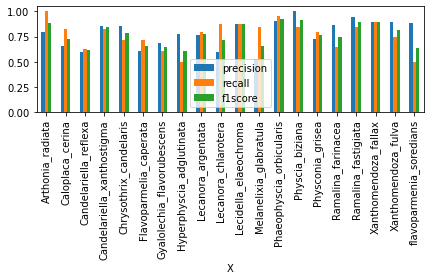

In [45]:
cc = '4'
f = 'train/prova_4_' + cc + '_2_'
g = 'test/prova_4_' + cc + '_2_'
labels_list = os.listdir(f)
title_lich = 'lichen_JLM_4'+ cc + '2_'
x_train,  y_train = extract_features(labels_list,f,summing = False)
x_test,  y_test = extract_features(labels_list,g,summing = False)

param_grid = {'C': [ 1e2, 1e3, 5e3, 1e4, 5e4], 'gamma': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 0.0001, 0.0005, 0.001, 0.005] }
clf0 = GridSearchCV(SVC(kernel = 'rbf'),param_grid)
clf = clf0.fit(x_train, y_train)
print("Best estimator found by grid search : ", clf.best_estimator_)
y_pred = clf.predict(x_test)
print('Accuracy score :', skmetrics.accuracy_score(y_pred, y_test))
#accuracy.append(skmetrics.accuracy_score(y_pred, y_test))
plt.figure(figsize = (15,10)) 

#plot_confusion_matrix(skmetrics.confusion_matrix(y_pred, y_test),labels_list,title_lich,'results/rbf/prova',clf.best_estimator_)
a,b,c = calculate_and_plot_precision_recall(y_test, y_pred, species,'results/rbf/','provapr_2_4_' + cc + '_' )
print(a)
print(b)

In [ ]:
df = pd.DataFrame({"X":[1,2,3,4,5,6,7,8], "precision":precision,"recall":recall,'accuracy': accuracy})
df.plot(x="X", y=["precision", "recall",'accuracy'], kind="bar")
plt.grid()
plt.xlabel('number of rotations')
plt.ylabel('Percentate %')
plt.tight_layout()
plt.savefig('results/mean_2_acc_prec_rec.jpg')

## FEW SHOT LEARNING ---> 0.7 AS TEST SIZE

this time we try to use 70 % of the dataset as test size and verify if we reach good performance 

In [122]:
from sklearn.model_selection import train_test_split
cc = '5'
f = 'train/prova_4_' + cc + '_2_'
g = 'test/prova_4_' + cc + '_2_'
labels_list = os.listdir(f)
title_lich = 'lichen_JLM_4'+ cc + '2_'
x_train,  y_train = extract_features(labels_list,f,summing = False)
x_test,  y_test = extract_features(labels_list,g,summing = False)


x = np.concatenate([x_train,x_test])
y = np.concatenate([y_train,y_test])





In [123]:
param_grid = {'C': [ 1e2, 1e3, 5e3, 1e4, 5e4], 'gamma': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 0.0001, 0.0005, 0.001, 0.005] }
clf0 = GridSearchCV(SVC(kernel = 'rbf'),param_grid)
clf = clf0.fit(x_tr, y_tr)
print("Best estimator found by grid search : ", clf.best_estimator_)

y_pred = clf.predict(x_tst)

print('Accuracy score :', skmetrics.accuracy_score(y_pred, y_tst))

Best estimator found by grid search :  SVC(C=50000.0, gamma=0.0001)
Accuracy score : 0.7230464886251237


-------------    0.6  ------------------
Best estimator found by grid search :  SVC(C=10000.0, gamma=0.0005)
Accuracy score : 0.7545551982851019
-------------    0.65  ------------------
Best estimator found by grid search :  SVC(C=1000.0, gamma=0.005)
Accuracy score : 0.7309594460929772
-------------    0.7  ------------------
Best estimator found by grid search :  SVC(C=5000.0, gamma=0.001)
Accuracy score : 0.699724517906336
-------------    0.75  ------------------
Best estimator found by grid search :  SVC(C=50000.0, gamma=0.0005)
Accuracy score : 0.6512425021422451
-------------    0.8  ------------------
Best estimator found by grid search :  SVC(C=5000.0, gamma=0.001)
Accuracy score : 0.5932475884244373
-------------    0.85  ------------------
Best estimator found by grid search :  SVC(C=50000.0, gamma=0.0001)
Accuracy score : 0.527231467473525
-------------    0.9  ------------------


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Best estimator found by grid search :  SVC(C=10000.0, gamma=0.0001)
Accuracy score : 0.3942857142857143
-------------    0.95  ------------------


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Best estimator found by grid search :  SVC(C=100.0, gamma=0.005)
Accuracy score : 0.2943166441136671


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


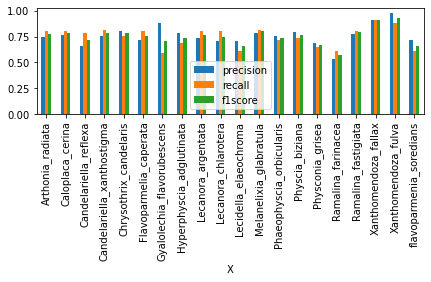

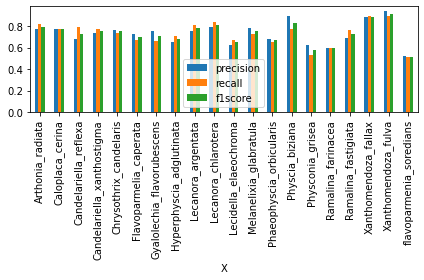

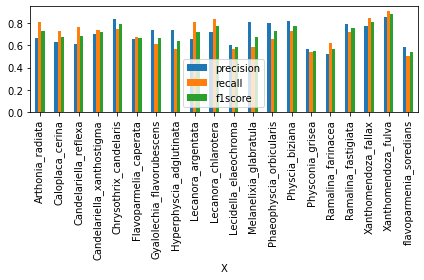

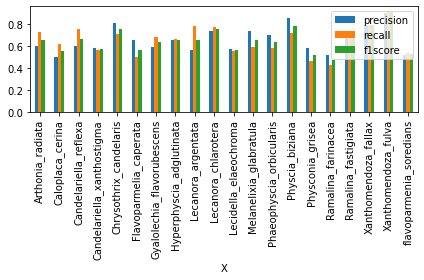

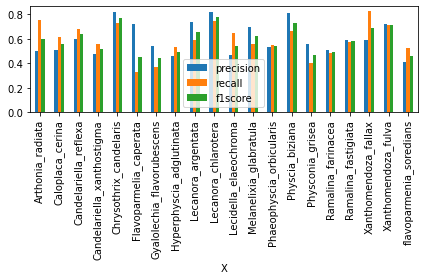

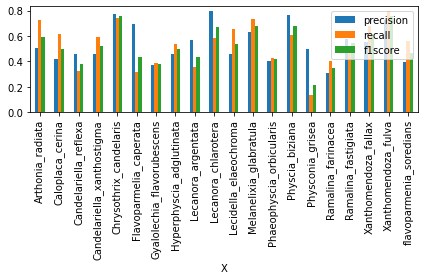

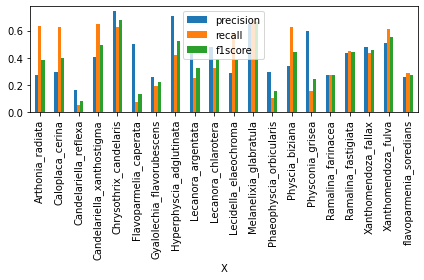

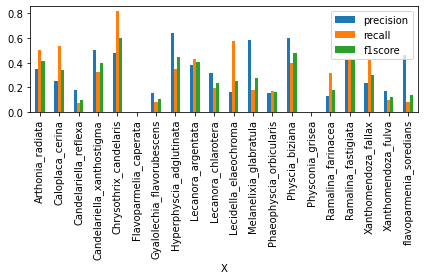

In [126]:
test_sz = [0.60,0.65,0.70,0.75,0.80,0.85,0.9,0.95]
acc = []
prec = []
rec = []
f1 = []
for sz in test_sz:
    print('-------------   ',sz,' ------------------')
    x_tr, x_tst, y_tr, y_tst = train_test_split(x, y, test_size=sz, random_state=40)
    param_grid = {'C': [ 1e2, 1e3, 5e3, 1e4, 5e4], 'gamma': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 0.0001, 0.0005, 0.001, 0.005] }
    clf0 = GridSearchCV(SVC(kernel = 'rbf'),param_grid)
    clf = clf0.fit(x_tr, y_tr)
    print("Best estimator found by grid search : ", clf.best_estimator_)

    y_pred = clf.predict(x_tst)

    print('Accuracy score :', skmetrics.accuracy_score(y_pred, y_tst))
    acc.append(skmetrics.accuracy_score(y_pred, y_tst))
    a,b,c = calculate_and_plot_precision_recall(y_tst, y_pred, species,'results/rbf/','cancellare' )
    prec.append(a)
    rec.append(b)
    f1.append(c)

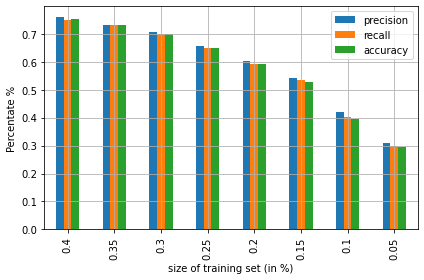

In [153]:
tr_set = [0.40,0.35,0.30,0.25,0.20,0.15,0.10,0.05]
df = pd.DataFrame({"X":tr_set, "precision":prec,"recall":rec,'accuracy': acc})
df.plot(x="X", y=["precision", "recall",'accuracy'], kind="bar")
plt.grid()
plt.xlabel('size of training set (in %)')
plt.ylabel('Percentate %')
plt.tight_layout()
plt.savefig('results/few_shot_total')

# CASO SPECIFICO 20% DEI DATI 

Best estimator found by grid search :  SVC(C=5000.0, gamma=0.001)
Accuracy score : 0.5932475884244373


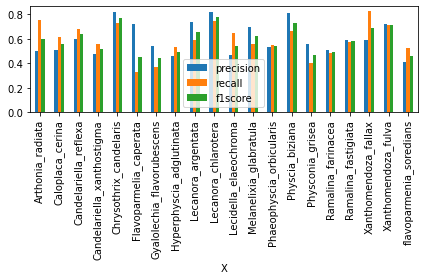

In [129]:

x_tr, x_tst, y_tr, y_tst = train_test_split(x, y, test_size=0.80, random_state=40)
param_grid = {'C': [ 1e2, 1e3, 5e3, 1e4, 5e4], 'gamma': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 0.0001, 0.0005, 0.001, 0.005] }
clf0 = GridSearchCV(SVC(kernel = 'rbf'),param_grid)
clf = clf0.fit(x_tr, y_tr)
print("Best estimator found by grid search : ", clf.best_estimator_)

y_pred = clf.predict(x_tst)
title_lich = '__'
print('Accuracy score :', skmetrics.accuracy_score(y_pred, y_tst))

#plot_confusion_matrix(skmetrics.confusion_matrix(y_pred, y_tst),labels_list,title_lich,'results/rbf',clf.best_estimator_)
a,b,c = calculate_and_plot_precision_recall(y_tst, y_pred, species,'results/rbf/','pca_few_shot' )


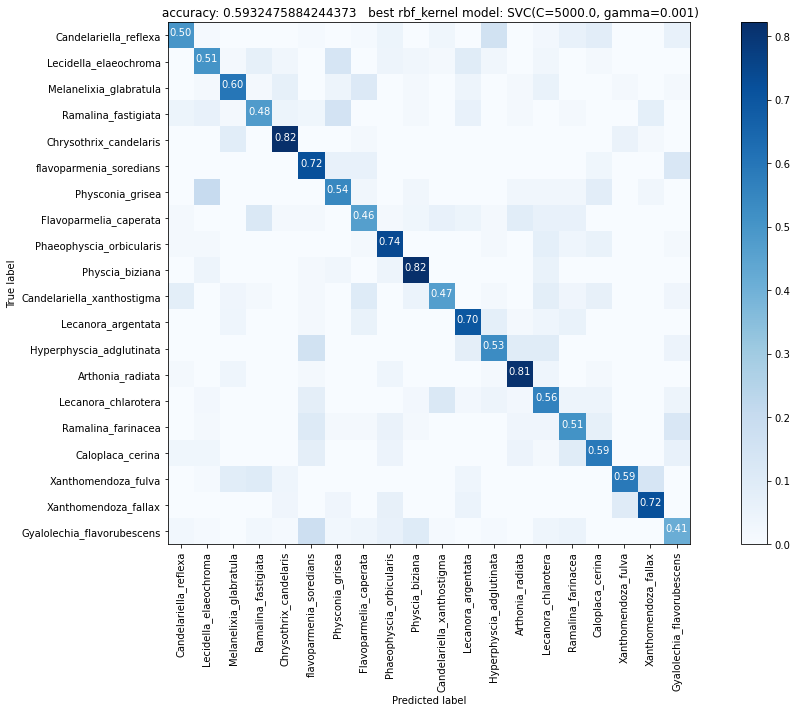

In [130]:
title_lich = '__'
plt.figure(figsize = (15,10)) 
plot_confusion_matrix(skmetrics.confusion_matrix(y_pred, y_tst),labels_list,title_lich,'results/rbf',clf.best_estimator_)

In [144]:
cont = np.zeros(20)
for c in y_tr:
    cont[c] += 1

In [148]:
cont

array([15., 21., 10., 18., 17., 10., 10., 17., 12., 17., 21., 14., 18.,
       14., 10., 20., 16., 21., 15., 15.])

In [151]:
y_tr.shape[0] + y_tst.shape[0]

1555

In [152]:
species

['Arthonia_radiata',
 'Caloplaca_cerina',
 'Candelariella_reflexa',
 'Candelariella_xanthostigma',
 'Chrysothrix_candelaris',
 'Flavoparmelia_caperata',
 'Gyalolechia_flavorubescens',
 'Hyperphyscia_adglutinata',
 'Lecanora_argentata',
 'Lecanora_chlarotera',
 'Lecidella_elaeochroma',
 'Melanelixia_glabratula',
 'Phaeophyscia_orbicularis',
 'Physcia_biziana',
 'Physconia_grisea',
 'Ramalina_farinacea',
 'Ramalina_fastigiata',
 'Xanthomendoza_fallax',
 'Xanthomendoza_fulva',
 'flavoparmenia_soredians']